<a href="https://colab.research.google.com/github/skander-kerkeni/Predict_if_it_s_photo_or_other/blob/data_preprocessing/Livrable1_Version0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size=15 color='992208'><center>Livrable 1</center></font> 

**Importation des libraries**


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Importer le dossier de dataset à partir de système de fichiers local**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exctaction du fichier "Dataset.rar"**

In [4]:
#cd /content/drive/MyDrive/
#!unrar x Dataset.rar

In [5]:
cd /content/drive/MyDrive/Projet Dataset/

/content/drive/MyDrive/Projet Dataset


In [6]:
ls

Dataset_L2/  original_dataset/


#1) Prepare training data

**2.** Charger les données d’apprentissage, de validation et de test de la dataset respectivement dans des conteneurs de type BatchDataset $train\_ds$ et $val\_ds$. Avec la taille des batch est 128, et la taille des images à $48\times 48$

In [17]:
batch_size = 128
img_height = 48
img_width = 48


**80% des données pour l'apprentissage et 20% pour la validation**

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   directory="original_dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 41406 files belonging to 5 classes.
Using 33125 files for training.


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory="original_dataset",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 41406 files belonging to 5 classes.
Using 8281 files for validation.


**Les classes du model**

In [20]:
class_names = train_ds.class_names
print(class_names)

['Painting', 'Photo', 'Schematics', 'Sketch', 'Text']


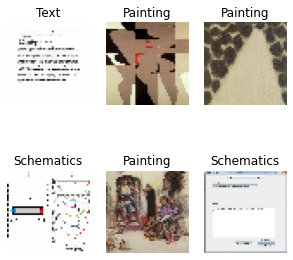

In [21]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
    for i in range(6):
      ax = plt.subplot(2, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 48, 48, 3)
(128,)


#2)Train model

In [23]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [24]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)